In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
# Load the CSV file
file_path = 'your_file_path_here.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter out the columns that are not needed for analysis
df_filtered = df.drop(['亚类', '土属', '土种'], axis=1)

# Identify the soil types (土类) and the environmental features
soil_types = df_filtered['土类'].unique()
env_features = df_filtered.columns.drop('土类')

# Function to plot 3D histograms for each feature across soil types
def plot_3d_histogram(feature, df_filtered, soil_types):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Prepare data for 3D histogram
    colors = plt.cm.jet(np.linspace(0, 1, len(soil_types)))
    hist_data = [df_filtered[df_filtered['土类'] == soil_type][feature] for soil_type in soil_types]
    bins = np.linspace(min(df_filtered[feature]), max(df_filtered[feature]), 20)

    # Construct the histogram
    for i, data in enumerate(hist_data):
        hist, bins = np.histogram(data, bins=bins)
        xs = (bins[:-1] + bins[1:]) / 2
        ax.bar(xs, hist, zs=i, zdir='y', color=colors[i], alpha=0.8, label=soil_types[i])

    ax.set_xlabel(feature)
    ax.set_ylabel('Soil Type')
    ax.set_zlabel('Frequency')
    ax.legend()

    plt.show()

In [ ]:
# Plotting the 3D histogram for each environmental feature
for feature in env_features[:3]:  # Limiting to first 3 features for example
    plot_3d_histogram(feature, df_filtered, soil_types)

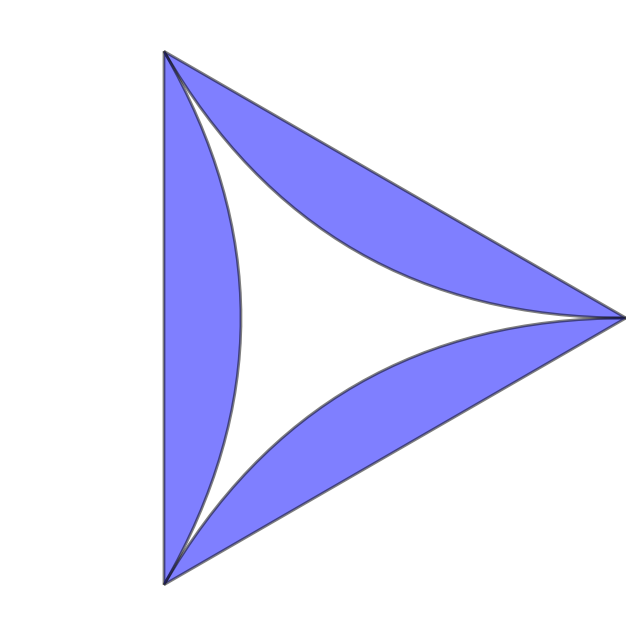

In [1]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

# 这是一个简化的例子，展示如何绘制弦图的基础元素
# 对于复杂的关系数据和精细的控制，您可能需要专门的库

def draw_chord(ax, p1, p2, radius=0.7, color='blue'):
    # 绘制两点之间的弦
    verts = [p1, (0,0), p2, (0,0)]
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=color, lw=2, alpha=0.5)
    ax.add_patch(patch)

# 计算圆上的点
def get_xy(radians, radius):
    return np.cos(radians)*radius, np.sin(radians)*radius

# 初始化绘图和坐标轴
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off') # 关闭坐标轴

# 假设我们有三个分类，分别在圆上均匀分布
categories = 3
angles = np.linspace(0, 2 * np.pi, categories, endpoint=False)

# 绘制分类之间的弦
for i in range(categories):
    for j in range(i+1, categories):
        p1 = get_xy(angles[i], 1)
        p2 = get_xy(angles[j], 1)
        draw_chord(ax, p1, p2)

plt.show()


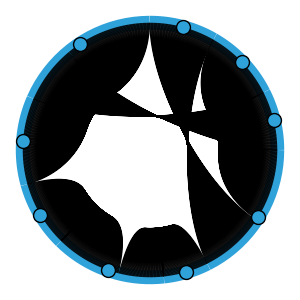

ChordPlot(apply_extents=True, apply_ranges=True, apply_ticks=True, arrowhead_length=0.025, aspect='square', backend_opts={}, bgcolor=None, cbar_extend=None, cbar_padding=0.01, cbar_ticks=None, cbar_width=0.05, cformatter=None, clabel=None, clim=(nan, nan), clim_percentile=False, clipping_colors={}, cnorm='linear', color_index=None, color_levels=None, colorbar=False, colorbar_opts={}, data_aspect=None, default_span=2.0, directed=False, edge_color_index=None, fig_alpha=1.0, fig_bounds=(0.15, 0.15, 0.85, 0.85), fig_inches=4.0, fig_latex=False, fig_rcparams={}, fig_size=100.0, fontscale=None, fontsize=None, hooks=[], initial_hooks=[], invert_axes=False, invert_xaxis=False, invert_yaxis=False, invert_zaxis=False, label_index=None, labelled=['x', 'y'], labels=None, logx=False, logy=False, logz=False, name='ChordPlot02079', normalize=True, padding=0.1, projection=None, rescale_discrete_levels=True, show_frame=False, show_grid=False, show_legend=True, show_title=True, sublabel_format=None, sub

In [11]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts

# 设置随机种子以便复现数据
np.random.seed(10)

# 随机模拟数据
data = {
    'Crops': ['Rice', 'Maize', 'Wheat'] * 6,
    'Regions': ['South America', 'Africa', 'Asia', 'Oceania', 'North America', 'Europe'] * 3,
    'Value': np.random.rand(18) * 100
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 创建弦图
chord = hv.Chord(df)

# 设置选项
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20')  # 这里不需要显式指定 labels, edge_color 或 node_color
)

# 显示弦图，指定 matplotlib 后端
hv.renderer('matplotlib').show(chord)


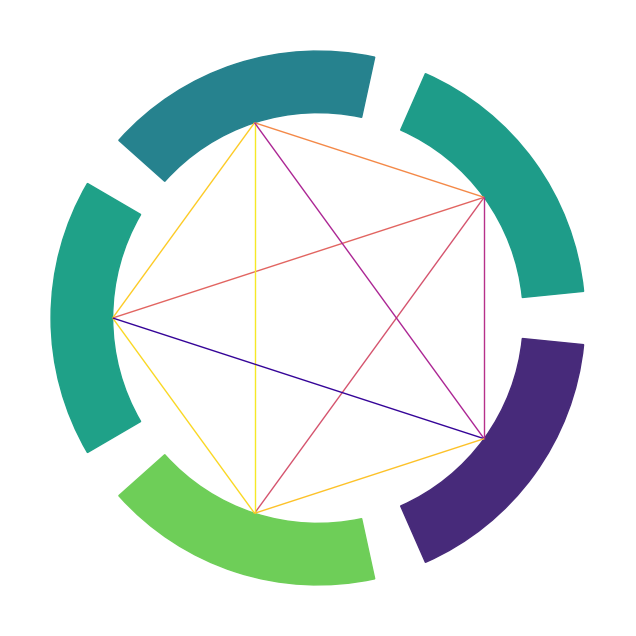

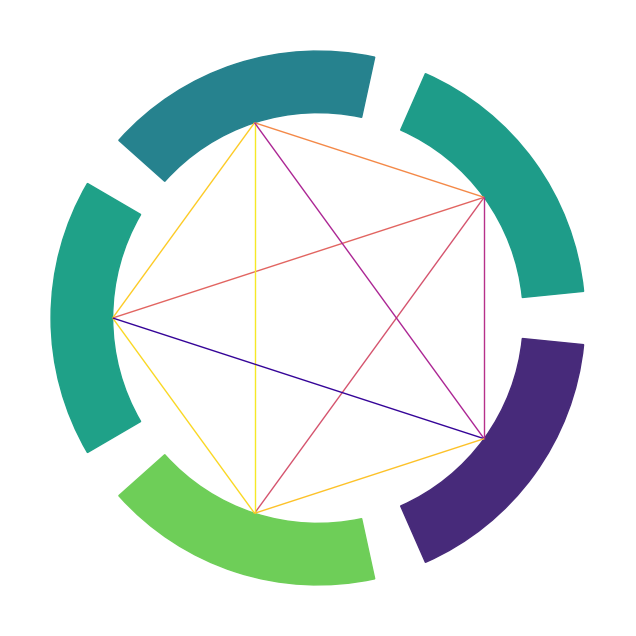

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Polygon
import numpy as np

# 设置随机种子
np.random.seed(0)

# 创建一个随机的相互作用矩阵
matrix_size = 5
interaction_matrix = np.random.rand(matrix_size, matrix_size)

# 创建一个画布和一个轴对象
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# 确定绘图参数
inner_radius = 1
outer_radius = 1.3
angle_gap = 0.1  # 用于分隔每个部分的间隙大小

# 计算每个部分的角度
angles = np.linspace(0, 2 * np.pi, matrix_size + 1)

# 绘制外圈
for i in range(matrix_size):
    theta1 = angles[i] + angle_gap
    theta2 = angles[i + 1] - angle_gap
    ax.add_patch(Wedge(center=(0, 0), r=outer_radius, theta1=np.degrees(theta1), theta2=np.degrees(theta2),
                       width=outer_radius-inner_radius, color=plt.cm.viridis(interaction_matrix[i, i])))

# 绘制内部的弦
for i in range(matrix_size):
    for j in range(i + 1, matrix_size):
        theta1 = (angles[i] + angles[i + 1]) / 2
        theta2 = (angles[j] + angles[j + 1]) / 2
        coords = [(inner_radius * np.cos(theta1), inner_radius * np.sin(theta1)), 
                  (inner_radius * np.cos(theta2), inner_radius * np.sin(theta2))]
        polygon = Polygon(coords, closed=False, color=plt.cm.plasma(interaction_matrix[i, j]))
        ax.add_patch(polygon)

# 隐藏坐标轴
ax.axis('off')

# 显示图像
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
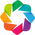

:Chord   [source,target]

In [10]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

# 创建一个随机的数据集
data = {
    'source': np.random.choice(['Rice', 'Maize', 'Wheat'], size=10),
    'target': np.random.choice(['South America', 'Africa', 'Asia', 'Oceania', 'North America', 'Europe'], size=10),
    'value': np.random.rand(10)
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 创建一个数据集对象，用于弦图
edges = hv.Dataset(df, kdims=['source', 'target'], vdims=[])

# 定义弦图的默认选项
opts.Chord(
    height=400, width=400,
    edge_cmap='Category10', node_cmap='Category10',
    label_index='index', edge_color='source', node_color='target'  # 确保这里使用正确的列名
)

# 创建弦图
chord = hv.Chord(edges)

# 显示弦图
chord
